In [1]:
from Modules import Ingenierie, data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
year_list = range(2016,2020)
all_data=data.load_data(year_list)

Loading data for season 2016
Data for season 2016 loaded successfully.
Loading data for season 2017
Data for season 2017 loaded successfully.
Loading data for season 2018
Data for season 2018 loaded successfully.
Loading data for season 2019
Data for season 2019 loaded successfully.


In [3]:
# Process the loaded data
combined_shots_data = Ingenierie.process_loaded_games(all_data)
combined_shots_data.to_csv('dataframe/combined_shots_data.csv', index=False)

In [4]:
combined_shots_data.head(5)

,shot_distance,shot_angle,is_goal,empty_net
0,51.429563,26.565051,0,1
1,30.083218,21.447736,0,1
2,13.000000,22.619865,0,0
3,33.060551,3.468229,0,1
4,38.078866,-13.671307,0,0


Histogramme du nombre de tirs (buts et non-buts séparés), regroupées (binned) par distance

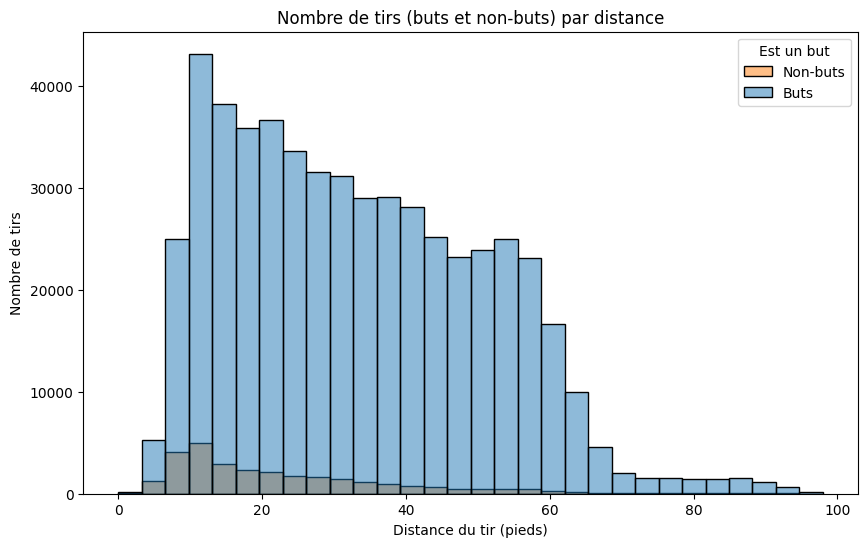

In [5]:
# Histogramme de la distance des tirs avec distinction entre buts et non-buts
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_shots_data, x="shot_distance", hue="is_goal", bins=30, kde=False)
plt.xlabel("Distance du tir (pieds)")
plt.ylabel("Nombre de tirs")
plt.title("Nombre de tirs (buts et non-buts) par distance")
plt.legend(title="Est un but", labels=["Non-buts", "Buts"])
plt.show()


Histogramme de l'angle des tirs avec distinction entre buts et non-buts

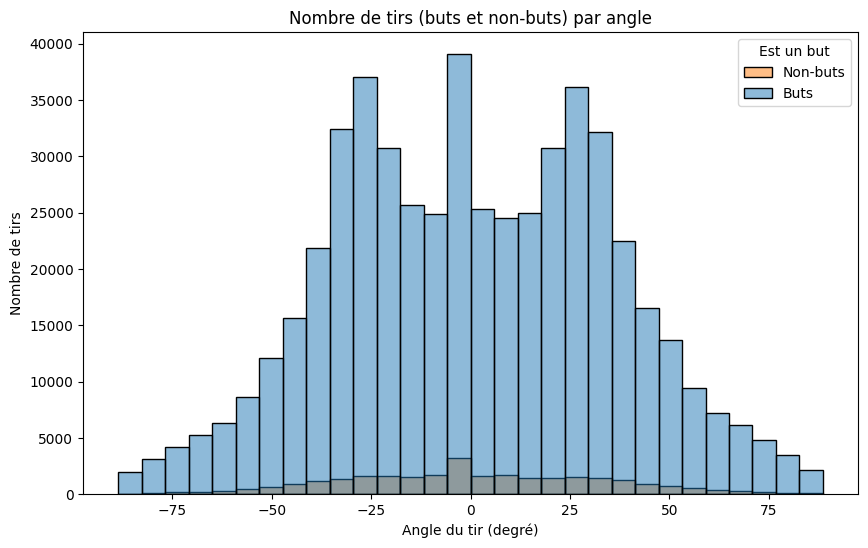

In [6]:
# Histogramme de l'angle des tirs avec distinction entre buts et non-buts
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_shots_data, x="shot_angle", hue="is_goal", bins=30, kde=False)
plt.xlabel("Angle du tir (degré)")
plt.ylabel("Nombre de tirs")
plt.title("Nombre de tirs (buts et non-buts) par angle")
plt.legend(title="Est un but", labels=["Non-buts", "Buts"])
plt.show()


Histogramme 2D pour distance vs angle

<Figure size 1000x600 with 0 Axes>

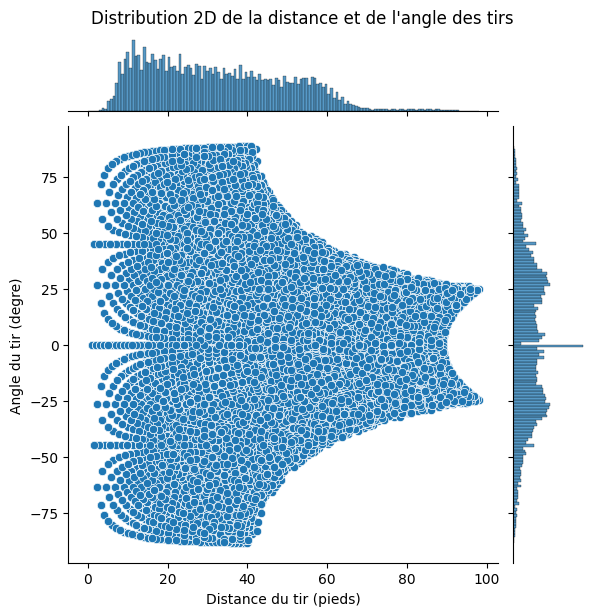

In [7]:
# Histogramme 2D pour distance vs angle
plt.figure(figsize=(10, 6))
sns.jointplot(data=combined_shots_data, x="shot_distance", y="shot_angle")
plt.suptitle("Distribution 2D de la distance et de l'angle des tirs", y=1.02)
plt.xlabel("Distance du tir (pieds)")
plt.ylabel("Angle du tir (degre)")
plt.show()


Histogrammes du Taux de but en fonction de la distance du tir et en fonction de l'angle du tir

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11436\243324288.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate_by_distance = combined_shots_data.groupby(distance_bins)['is_goal'].mean()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11436\243324288.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate_by_angle = combined_shots_data.groupby(angle_bins)['is_goal'].mean()


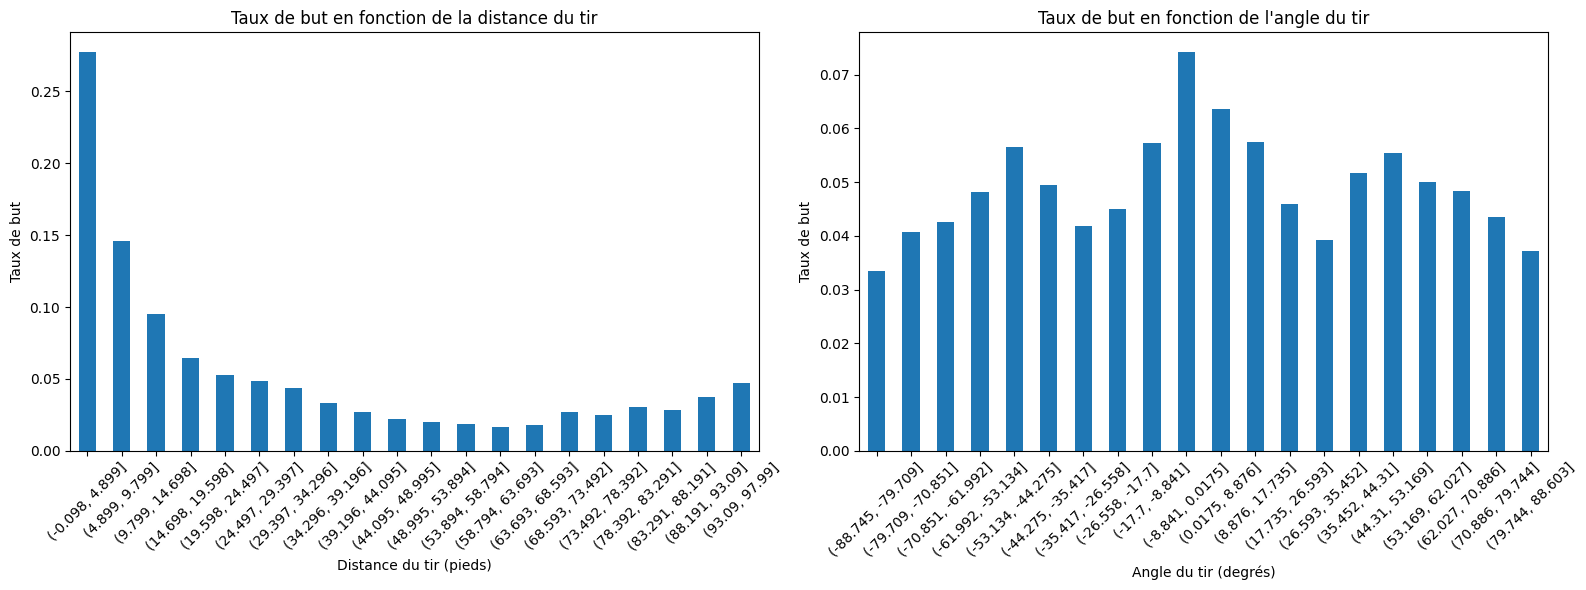

In [8]:
# Créer des colonnes temporaires pour les intervalles de distance et d'angle
distance_bins = pd.cut(combined_shots_data['shot_distance'], bins=20)
angle_bins = pd.cut(combined_shots_data['shot_angle'], bins=20)

# Calculer le taux de but par distance sans modifier le DataFrame original
goal_rate_by_distance = combined_shots_data.groupby(distance_bins)['is_goal'].mean()

# Calculer le taux de but par angle sans modifier le DataFrame original
goal_rate_by_angle = combined_shots_data.groupby(angle_bins)['is_goal'].mean()

# Créer une figure avec deux sous-graphiques côte à côte
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Taux de but par distance
goal_rate_by_distance.plot(kind='bar', ax=ax[0])
ax[0].set_xlabel("Distance du tir (pieds)")
ax[0].set_ylabel("Taux de but")
ax[0].set_title("Taux de but en fonction de la distance du tir")
ax[0].tick_params(axis='x', rotation=45)

# Taux de but par angle
goal_rate_by_angle.plot(kind='bar', ax=ax[1])
ax[1].set_xlabel("Angle du tir (degrés)")
ax[1].set_ylabel("Taux de but")
ax[1].set_title("Taux de but en fonction de l'angle du tir")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Histogramme de Nombres de buts par distance 

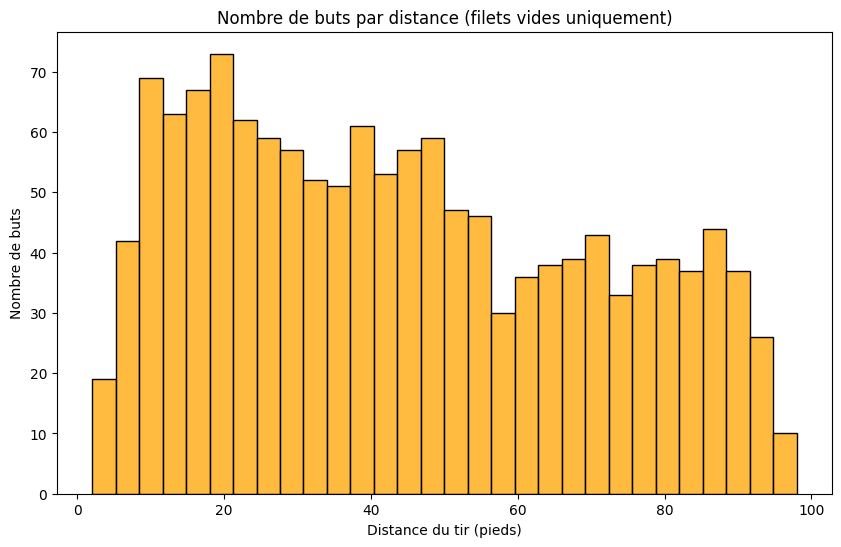

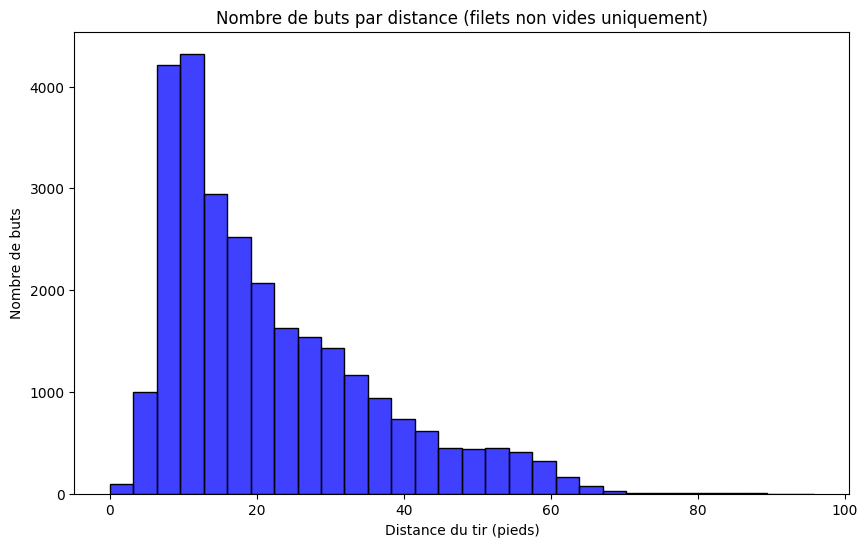

In [12]:

# Filter only goal events and where empty_net is True
goals_data_empty_net = combined_shots_data[(combined_shots_data['is_goal'] == 1) & (combined_shots_data['empty_net'] == 1)]

# Create a histogram of goals by distance (for empty nets only)
plt.figure(figsize=(10, 6))
sns.histplot(data=goals_data_empty_net, x="shot_distance", bins=30, kde=False, color="orange")
plt.xlabel("Distance du tir (pieds)")
plt.ylabel("Nombre de buts")
plt.title("Nombre de buts par distance (filets vides uniquement)")
plt.show()

# Filter only goal events and where empty_net is False
goals_data_no_empty_net = combined_shots_data[(combined_shots_data['is_goal'] == 1) & (combined_shots_data['empty_net'] == 0)]

# Create a histogram of goals by distance (for non-empty nets only)
plt.figure(figsize=(10, 6))
sns.histplot(data=goals_data_no_empty_net, x="shot_distance", bins=30, kde=False, color="blue")
plt.xlabel("Distance du tir (pieds)")
plt.ylabel("Nombre de buts")
plt.title("Nombre de buts par distance (filets non vides uniquement)")
plt.show()
